# Progress Report 1 - Overview

Here's an example of what an annotated sentence looks like:

```xml
<sentence id="63444" status="reviewed" presentation-after=" " indirect-type="AcI">
    <token id="734889" form="perfacile" citation-part="1.2.2" lemma="perfacilis" part-of-speech="A-"
           morphology="-s---nap-i" head-id="734890" relation="xobj" presentation-before=" " presentation-after=" ">
        <slash target-id="734898" relation="xsub" />
    </token>
    <token id="734890" form="esse" citation-part="1.2.2" lemma="sum" part-of-speech="V-"
           morphology="--pna----i" head-id="854742" relation="comp" presentation-after=", " />
    <token id="734891" form="cum" citation-part="1.2.2" lemma="cum" part-of-speech="G-"
           morphology="---------n" head-id="734890" relation="adv" presentation-after=" " />
    <token id="734892" form="virtute" citation-part="1.2.2" lemma="virtus" part-of-speech="Nb"
           morphology="-s---fb--i" head-id="734894" relation="obl" information-status="info_unannotatable"
           presentation-after=" " />
    <token id="734893" form="omnibus" citation-part="1.2.2" lemma="omnis" part-of-speech="Px"
           morphology="-p---mb--i" head-id="734894" relation="obl" information-status="quant"
           presentation-after=" " />
    <token id="1179200" empty-token-sort="P" citation-part="1.2.2" head-id="734894"
           relation="sub" antecedent-id="1179198" information-status="old" />
    <token id="734894" form="praestarent" citation-part="1.2.2" lemma="praesto" part-of-speech="V-"
           morphology="3pisa----i" head-id="734891" relation="pred" presentation-after=", " />
    <token id="734895" form="totius" citation-part="1.2.2" lemma="totus" part-of-speech="A-"
           morphology="-s---ngp-i" head-id="734896" relation="atr" presentation-after=" " />
    <token id="734896" form="Galliae" citation-part="1.2.2" lemma="Gallia" part-of-speech="Ne"
           morphology="-s---fg--i" head-id="734897" relation="narg"
           antecedent-id="680720" information-status="old" presentation-after=" " />
    <token id="734897" form="imperio" citation-part="1.2.2" lemma="imperium" part-of-speech="Nb"
           morphology="-s---nb--i" head-id="734898" relation="obl" information-status="new"
           presentation-after=" " />
    <token id="1179199" empty-token-sort="P" citation-part="1.2.2" head-id="734898"
           relation="sub" antecedent-id="1179200" information-status="old" />
    <token id="734898" form="potiri" citation-part="1.2.2" lemma="potior" part-of-speech="V-"
           morphology="--pnp----i" head-id="734890" relation="comp" presentation-after=". " />
    <token id="854742" empty-token-sort="V" citation-part="1.2.2" relation="pred" />
</sentence>
```

and the sentence annotated:

> *perfacile esse, cum virtūte omnibus praestārent, tōtīus Galliae imperiō potīrī.*  
> \[saying\] that it would be very easy, since they excelled all in valor, to acquire the supremacy of the whole of Gaul. -- *(W. A. McDevitte and W. S. Bohn)*

What I added was the sentence-level attribute `indirect-type`, which encodes the type of indirect speech clause:

* Accusative + infinitive: `"AcI"`
* Introduced by *quod*: `"quod"`
* Introduced by *quia*: `"quia"`
* Introduced by *quoniam*: `"quoniam"`
* Introduced by *quīn*: `"quin"`

With the help of the `annotate.py` script, a good portion of the data has been collected and annotated, though likely some still remains. Let's take a look at what we have.

In [1]:
import pandas as pd
import xml.etree.ElementTree as et

In [2]:
file_names = ['caes-gal.xml', 'cic-att.xml', 'cic-off.xml', 'latin-nt.xml', 'pal-agr.xml', 'per-aeth.xml']
file_names = list(map(lambda s: 'annotations/' + s, file_names))

In [3]:
def get_text(sent):
    text = ''
    for tok in sent.iter('token'):
        if tok.get('form') != None and tok.get('presentation-after') != None:
            text += tok.get('form') + tok.get('presentation-after')
    return text

In [15]:
sents = []
unique_id = 0
for file in file_names:
    xml = et.parse(file)
    for sent in xml.iter('sentence'):
        sent.set('file', file[len('annotations/'):])
        if sent.get('id') == None:
            sent.set('id', 'U' + str(unique_id))
            unique_id += 1
        sents.append(sent)

df = pd.DataFrame()
df['Id'] = [sent.get('id') for sent in sents]
df['File'] = [sent.get('file') for sent in sents]
df['Type'] = [sent.get('indirect-type') for sent in sents]
df['Text'] = [get_text(sent) for sent in sents]
df

448
1072
1174
2204
2290
2380


,Id,File,Type,Text
0,63444,caes-gal.xml,AcI,"perfacile esse, cum virtute omnibus praestaren..."
1,52564,caes-gal.xml,AcI,Pro multitudine autem hominum et pro gloria be...
2,52566,caes-gal.xml,AcI,Ad eas res conficiendas biennium sibi satis es...
3,52572,caes-gal.xml,AcI,Perfacile factu esse illis probat conata perfi...
4,52574,caes-gal.xml,AcI,Hac oratione adducti inter se fidem et ius iur...
...,...,...,...,...
2375,58111,per-aeth.xml,AcI,"Octaua enim septimana quadragesimarum, id est ..."
2376,58117,per-aeth.xml,AcI,"Et ne extimetis aliquid sine ratione fieri, cu..."
2377,58123,per-aeth.xml,AcI,"Vere enim ita misteria omnia absoluet, ut null..."
2378,58126,per-aeth.xml,AcI,"Lectiones etiam, quecumque in ecclesia leguntu..."


In [13]:
dd

0

I plan on fleshing out this dataframe with columns for work and author.

<AxesSubplot:>

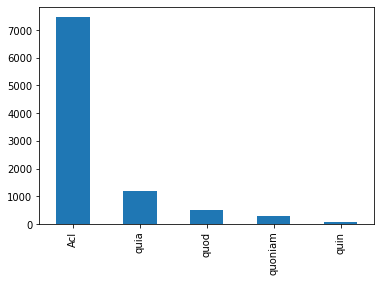

In [5]:
df['Type'].value_counts().plot.bar()

Wow! We can already see there's a lot more accusative + infintive constructions than all other types combined! Let's compare two authors.

<AxesSubplot:>

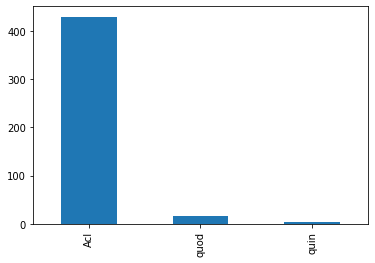

In [6]:
df[df.File == 'caes-gal.xml']['Type'].value_counts().plot.bar()

<AxesSubplot:>

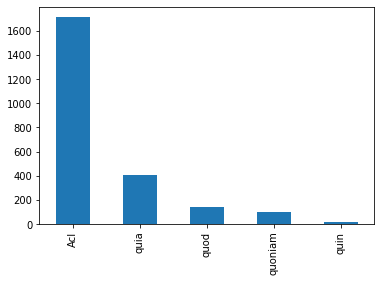

In [7]:
df[df.File == 'per-aeth.xml']['Type'].value_counts().plot.bar()

There seems to be more use of subordinators - not enough to definitively conclude anything, though.